In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
city_data = pd.read_csv('city_data.csv')
city_list = pd.read_csv('city_list.csv')
global_data = pd.read_csv('global_data.csv')  

In [103]:
city_data

,year,city,country,avg_temp
0,1849,Abidjan,Côte D'Ivoire,25.58
1,1850,Abidjan,Côte D'Ivoire,25.52
2,1851,Abidjan,Côte D'Ivoire,25.67
3,1852,Abidjan,Côte D'Ivoire,NaN
4,1853,Abidjan,Côte D'Ivoire,NaN
...,...,...,...,...
70787,2009,Zapopan,Mexico,21.76
70788,2010,Zapopan,Mexico,20.90
70789,2011,Zapopan,Mexico,21.55
70790,2012,Zapopan,Mexico,21.52


In [102]:
city_list

,city,country
0,Abidjan,Côte D'Ivoire
1,Abu Dhabi,United Arab Emirates
2,Abuja,Nigeria
3,Accra,Ghana
4,Adana,Turkey
...,...,...
337,Xuzhou,China
338,Yamoussoukro,Côte D'Ivoire
339,Yerevan,Armenia
340,Zagreb,Croatia


In [104]:
global_data

,year,avg_temp,global moving avg temp
0,1750,8.72,NaN
1,1751,7.98,NaN
2,1752,5.78,NaN
3,1753,8.39,NaN
4,1754,8.47,7.868
...,...,...,...
261,2011,9.52,9.578
262,2012,9.51,9.534
263,2013,9.61,9.570
264,2014,9.57,9.582


In [4]:
la_data = city_data[(city_data['city'] == 'Los Angeles') & 
                    (city_data['country'] == 'United States')]


In [5]:
la_data['la moving avg temp'] = la_data.iloc[:,3].rolling(window=5).mean()

<ipython-input-5-1515c11260e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  la_data['la moving avg temp'] = la_data.iloc[:,3].rolling(window=5).mean()


In [94]:
la_data

,year,city,country,avg_temp,la moving avg temp
36607,1849,Los Angeles,United States,15.71,NaN
36608,1850,Los Angeles,United States,15.28,NaN
36609,1851,Los Angeles,United States,15.53,NaN
36610,1852,Los Angeles,United States,15.61,NaN
36611,1853,Los Angeles,United States,16.27,15.680
...,...,...,...,...,...
36767,2009,Los Angeles,United States,16.68,16.688
36768,2010,Los Angeles,United States,15.89,16.580
36769,2011,Los Angeles,United States,15.87,16.430
36770,2012,Los Angeles,United States,17.09,16.508


In [6]:
global_data['global moving avg temp'] = global_data.iloc[:,1].rolling(window=5).mean()

In [13]:
global_data

,year,avg_temp,global moving avg temp
0,1750,8.72,NaN
1,1751,7.98,NaN
2,1752,5.78,NaN
3,1753,8.39,NaN
4,1754,8.47,7.868
...,...,...,...
261,2011,9.52,9.578
262,2012,9.51,9.534
263,2013,9.61,9.570
264,2014,9.57,9.582


In [7]:
combined = global_data.merge(la_data, left_on='year', right_on='year', how='left')[103:-2]

In [109]:
combined

,year,avg_temp_x,global moving avg temp,city,country,avg_temp_y,la moving avg temp
103,1853,8.04,8.040,Los Angeles,United States,16.27,15.680
104,1854,8.21,8.086,Los Angeles,United States,15.74,15.686
105,1855,8.11,8.128,Los Angeles,United States,15.94,15.818
106,1856,8.00,8.092,Los Angeles,United States,15.52,15.816
107,1857,7.76,8.024,Los Angeles,United States,16.19,15.932
...,...,...,...,...,...,...,...
259,2009,9.51,9.580,Los Angeles,United States,16.68,16.688
260,2010,9.70,9.580,Los Angeles,United States,15.89,16.580
261,2011,9.52,9.578,Los Angeles,United States,15.87,16.430
262,2012,9.51,9.534,Los Angeles,United States,17.09,16.508


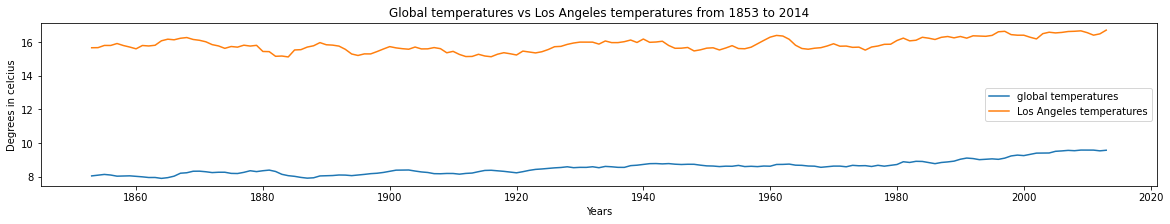

<Figure size 3600x3600 with 0 Axes>

In [101]:
plt.plot(combined['year'], combined['global moving avg temp'], label = 'global temperatures')
plt.plot(combined['year'], combined['la moving avg temp'], label = 'Los Angeles temperatures')
plt.title('Global temperatures vs Los Angeles temperatures from 1853 to 2014')
plt.xlabel('Years')
plt.ylabel('Degrees in celcius')
plt.legend()
plt.figure(figsize=(50, 50))
plt.show()

In [10]:
combined['la moving avg temp'].mean() - 
combined['global moving avg temp'].mean()  

7.321130434782601

In [110]:
combined['global moving avg temp'].max() - 
combined['global moving avg temp'].min()

1.6879999999999935

In [111]:
combined['la moving avg temp'].max() - 
combined['la moving avg temp'].min()

1.5979999999999972

In [22]:
global_data.loc[global_data['avg_temp'].idxmax()]

year                      2015.000
avg_temp                     9.830
global moving avg temp       9.608
Name: 265, dtype: float64

In [23]:
global_data.loc[global_data['avg_temp'].idxmin()]

year                      1752.00
avg_temp                     5.78
global moving avg temp        NaN
Name: 2, dtype: float64

In [24]:
la_data.loc[la_data['avg_temp'].idxmax()]

year                           2013
city                    Los Angeles
country               United States
avg_temp                      18.12
la moving avg temp            16.73
Name: 36771, dtype: object

In [25]:
la_data.loc[la_data['avg_temp'].idxmin()]

year                           1880
city                    Los Angeles
country               United States
avg_temp                      14.36
la moving avg temp           15.458
Name: 36638, dtype: object